# Caceria [D_S] Lord Mobile

# Caceria Gremio D_S

Como gremio la caceria de monstruos es importante para el crecimiento. En este contexto todos los jugadores tienen un objetivo diario por cumplir en caceria, el cual depende del nivel de castilllo. El siguiente cuadro muestra los objetivos diarios de cada jugador

Nivel jugador | Objetivo diaria
--- | ---
1-14 | 1
15-19 | 2
20-23 | 3
24 | 4
25 | 5

Para porder realizar un seguimiento que permita identificar a los jugadores que más aportan en la caceria de monstruos se ha asignado un puntaje por jugador dependiendo de las cacerias que realizen. El puntaje depende de que nivel de monstruo cacen, siguiente el siguiente cuadro

Nivel monstruo | Puntaje por monstruo
---   | ---
N1    | 1
N2    | 4
N3    | 16
N4    | 64

--- 

## Caceria Mensuales

**Objetivo** : mostrar los resultados por semanas

> 1. Caceria totales
> 2. Ranking por puntajes

---

## Caceria Individuales mensuales
**Objetivo** : ver el avance de cada jugador por mes

> 1. Registro de las cacerias individuales por mes

---

## Caceria Individuales ultimo dia

> 1. Registro de las cacerias individuales del último día
> 2. Comparativa con los objetivos diarios de cada jugador por nivel de castillo

---

## Pendientes
1. Registro de jugadores:
    - registro de todos los miembros del gremio actualizada
    - registro del nivel de castillo de cada jugador
2. Resultados individuales por semana
    - plot
    - pie char

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

niveles = ['N1', 'N2', 'N3', 'N4']

puntaje = [1, 4, 16, 64]



In [3]:
i=0
name = ['output_2021-08-14']
df = pd.read_csv('./output/%s.txt'%name[i], index_col=0)
print('>> Total de Caceria: %i'%df['Total'].sum())
print(df.sort_values('Total',ascending=False))

>> Total de Caceria: 132
              N1  N2  N3  N4  Total  Puntaje
Nombre                                      
Vainilla      15   2   0   0     17       19
Arkeus11      12   0   0   0     12       12
MoRRiGaNC      9   1   0   0     10       11
KingAlexx27    8   0   0   0      8        8
DyK12          5   2   0   0      7        9
Conde Puf      6   0   0   0      6        6
LordKanino19   2   3   0   0      5        8
Jocs4          4   1   0   0      5        6
R P D          1   4   0   0      5        9
Xacobeo21      4   0   0   0      4        4
jose rosario   4   0   0   0      4        4
YxXSimbaxXY    4   0   0   0      4        4
Diofanto       3   1   0   0      4        5
AntiZion       4   0   0   0      4        4
El Templari0   4   0   0   0      4        4
hirowiro       3   0   0   0      3        3
SS Versachi    3   0   0   0      3        3
GadrielS       3   0   0   0      3        3
e1ver          3   0   0   0      3        3
Br1Mrcelo      1   2   0   0  

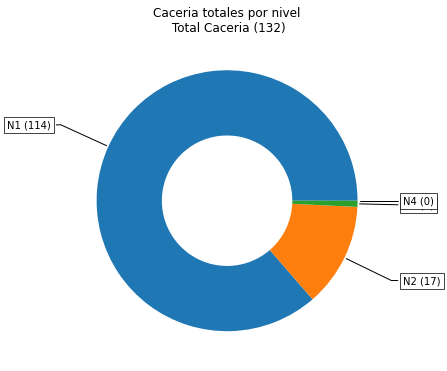

In [4]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

data = df.loc[:,niveles].sum()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate('%s (%i)'%(niveles[i],data[i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Caceria totales por nivel\n Total Caceria (%i)"%df['Total'].sum())
plt.show()

./output/output_2021-08-01_error.txt
./output/output_2021-08-02_error.txt
./output/output_2021-08-03_error.txt
./output/output_2021-08-04_error.txt
./output/output_2021-08-05.txt
./output/output_2021-08-06.txt
./output/output_2021-08-07.txt
./output/output_2021-08-08_error.txt
./output/output_2021-08-09_error.txt
./output/output_2021-08-10_error.txt
./output/output_2021-08-11_error.txt
./output/output_2021-08-12_error.txt
./output/output_2021-08-13_error.txt
./output/output_2021-08-14_error.txt


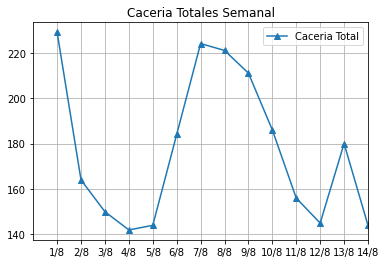

In [5]:
tiempo_final = dt.date.today()
dd = tiempo_final.day
mm = tiempo_final.month
yy = tiempo_final.year
tiempo_inicio = tiempo_final - dt.timedelta(days=tiempo_final.day-1)

numero_dia_mes = (dt.date(yy,mm+1,1) - tiempo_inicio ).days

ytotal = pd.DataFrame([], columns=['Total'])

for dia in range(numero_dia_mes):
    time = tiempo_inicio + dt.timedelta(days=dia)
    if time <= tiempo_final:
        ytotal.loc[time] = 0
        try:
            name = './output/output_%s_error.txt'%str(time)
            if not os.path.isfile(name):
                name = name.replace('_error.txt', '.txt')
            print(name)
            df_dia = pd.read_csv(name, index_col=0)
            ytotal.loc[time] = df_dia['Total'].sum()
        except FileNotFoundError as e:
            print(e)

plt.plot(ytotal.index, ytotal, '^-',label='Caceria Total')
plt.title('Caceria Totales Semanal')
plt.xlim([tiempo_inicio-dt.timedelta(days=1),tiempo_inicio+dt.timedelta(days=7+1)])
plt.xticks(ytotal.index, ['%i/%i'%(val.day,val.month) for val in ytotal.index])
plt.legend()
plt.grid()
plt.show()

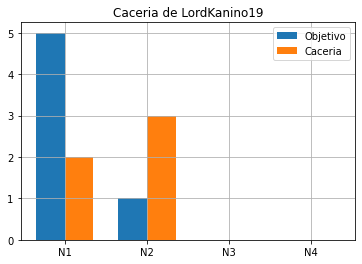

In [11]:
susodico_a = 'LordKanino19'
objetivo = [5,1,0,0]
x = np.arange(len(niveles))
width = 0.35

datos = df.loc[susodico_a]

fig, ax = plt.subplots()

ax.bar(x - width/2, objetivo, width=width, label='Objetivo')
ax.bar(x + width/2, datos.loc[niveles].values,width=width, label='Caceria')
ax.set_title('Caceria de %s'%datos.name)
ax.set_xticks(x)
ax.set_xticklabels(niveles)
ax.legend()
ax.grid()
plt.show()

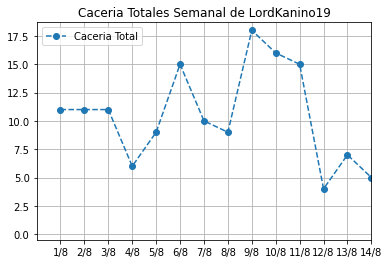

In [12]:
ytotal = pd.DataFrame([], columns=['Total'])

for dia in range(numero_dia_mes):
    time = tiempo_inicio + dt.timedelta(days=dia)
    if time <= tiempo_final:
        ytotal.loc[time] = 0 
        try:
            df_dia = pd.read_csv('./output/output_%s.txt'%str(time), index_col=0).loc[susodico_a]
            ytotal.loc[time] = df_dia['Total'].sum()
        except FileNotFoundError as e:
            print(e)


plt.plot(ytotal.index, ytotal, 'o--',label='Caceria Total')
plt.title('Caceria Totales Semanal de %s'%susodico_a)
plt.xlim([tiempo_inicio-dt.timedelta(days=1),tiempo_inicio+dt.timedelta(days=7+1)])
plt.xticks(ytotal.index, ['%i/%i'%(val.day,val.month) for val in ytotal.index])
plt.ylim(bottom=-0.5)
plt.legend()
plt.grid()
plt.show()

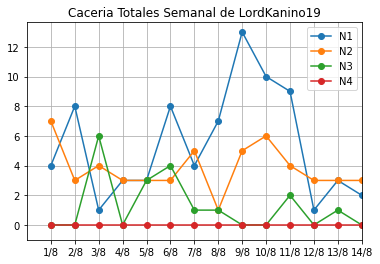

In [13]:
tiempo_final = dt.date.today()
dd = tiempo_final.day
mm = tiempo_final.month
yy = tiempo_final.year
tiempo_inicio = tiempo_final - dt.timedelta(days=tiempo_final.day-1)

numero_dia_mes = (dt.date(yy,mm+1,1) - tiempo_inicio ).days

ytotal = pd.DataFrame([], columns=['N1', 'N2', 'N3', 'N4','Total'])
for dia in range(numero_dia_mes):
    time = tiempo_inicio + dt.timedelta(days=dia)
    if time <= tiempo_final:
        ytotal.loc[time] = 0 
        try:
            df_dia = pd.read_csv('./output/output_%s.txt'%str(time), index_col=0)
            ytotal.loc[time] = df_dia.loc[susodico_a,['N1', 'N2', 'N3', 'N4','Total']]
        except FileNotFoundError as e:
            print(e)

plt.plot(ytotal.index,ytotal['N1'].values, 'o-',label='N1')
plt.plot(ytotal.index,ytotal['N2'].values, 'o-',label='N2')
plt.plot(ytotal.index,ytotal['N3'].values, 'o-',label='N3')
plt.plot(ytotal.index,ytotal['N4'].values, 'o-',label='N4')
# plt.plot(ytotal['N1'], '^-',label='N1')
plt.title('Caceria Totales Semanal de %s'%susodico_a)
plt.xlim([tiempo_inicio-dt.timedelta(days=1),tiempo_inicio+dt.timedelta(days=7+1)])
plt.xticks(ytotal.index, ['%i/%i'%(val.day,val.month) for val in ytotal.index])
plt.ylim(bottom=-1)
plt.legend()

plt.grid()
plt.show()

N1    2
N2    3
N3    0
N4    0
Name: LordKanino19, dtype: int64


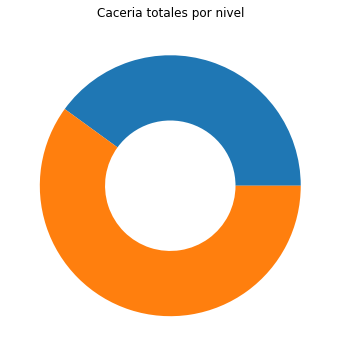

In [14]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

data = df.loc[susodico_a,niveles]
print(data)

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    #ax.annotate('%s (%i)'%(niveles[i],data[i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)

ax.set_title("Caceria totales por nivel")
plt.show()